##### Loads all needed libraries 

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

##### Load the actual dataset
 - Make sure to change path to whatever the relevant path is when running

In [26]:
def prepFashionData(fileName):
    path = "/Users/Michael/Desktop/PlanningAhead/archive/"
    fullSet = pd.read_csv(path + fileName)
    labels = fullSet['label']
    fullSet = fullSet.drop('label', axis=1)
    return fullSet, labels  # (X, Y)


(x, y) = prepFashionData("fashion-mnist_test.csv")
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33) 
# I split the training up after getting sick of waiting 10 minutes for each result

Accuracy of Random Forrest:  0.8575757575757575
RMSE on test data from Random Forrest:  1.3916417163432069



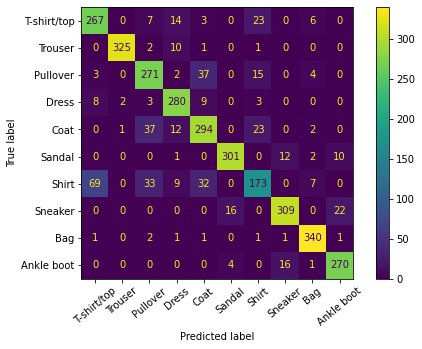

In [33]:
# Random forrest Classification
def randoForrest(trainX, trainY, testX, testY):
    RF = RandomForestClassifier(n_estimators=100, max_depth=15)
    RF.fit(trainX, trainY)
    RF_predictions = RF.predict(testX)
    print("Accuracy of Random Forrest: ", metrics.accuracy_score(testY, RF_predictions))  # Computes exact accuracy
    print('RMSE on test data from Random Forrest: ', mean_squared_error(testY, RF_predictions) ** 0.5)
    print("")
    fig, ax = plt.subplots(figsize=(8, 5))
    cmp = ConfusionMatrixDisplay(
        confusion_matrix(testY, RF_predictions),
        display_labels=["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag",
                        "Ankle boot"],
    )
    cmp.plot(ax=ax)
    
    plt.xticks(rotation=40)
    plt.show()
    
    return RF_predictions
    
RF_pred = randoForrest(x_train, y_train, x_test, y_test)

Accuracy of K Nearest Neighbor:  0.8178787878787879
RMSE on test data from K Nearest Neighbor:  1.551441167743623



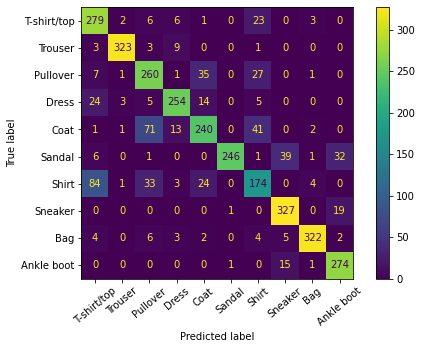

In [34]:
# K Nearest Neighbors - takes ages
def KNearestN(trainX, trainY, testX, testY):
    knn = KNeighborsClassifier(n_neighbors=4)
    knn.fit(trainX, trainY)
    y_pred = knn.predict(testX)
    print("Accuracy of K Nearest Neighbor: ", metrics.accuracy_score(testY, y_pred))  # Computes exact accuracy
    print('RMSE on test data from K Nearest Neighbor: ', mean_squared_error(testY, y_pred) ** 0.5)
    print("")
    
    fig, ax = plt.subplots(figsize=(8, 5))
    cmp = ConfusionMatrixDisplay(
        confusion_matrix(testY, y_pred),
        display_labels=["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"],
    )
    cmp.plot(ax=ax)

    plt.xticks(rotation=40)
    plt.show()
    
    return y_pred
    
KNN_pred = KNearestN(x_train, y_train, x_test, y_test)

Accuracy of OvR Classifier:  0.8566666666666667
RMSE on test data from OvR Classifier:  1.3979422106233235



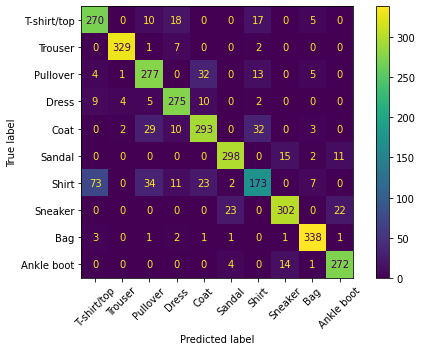

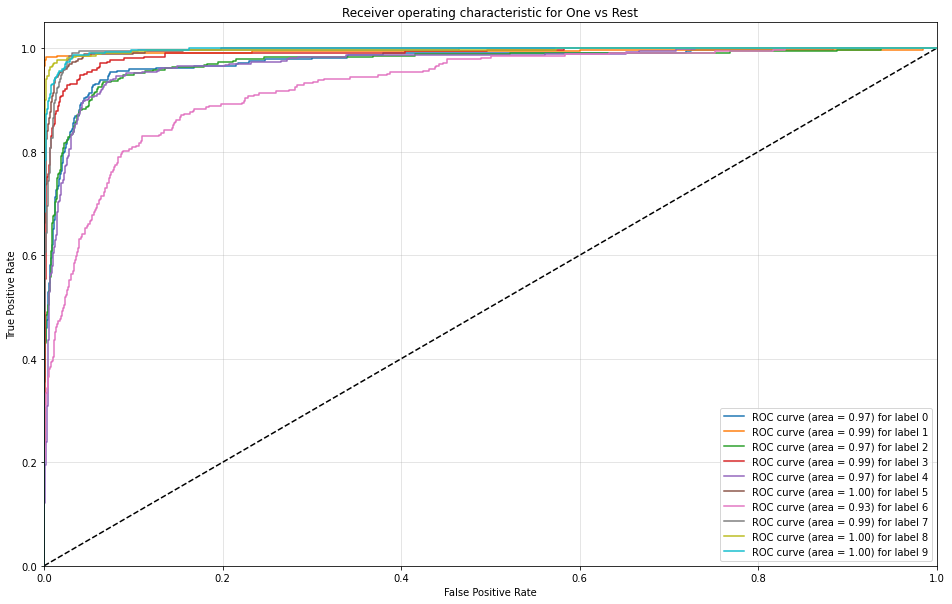

In [35]:
# One vs Rest Classifier
def OVR(XT, YT, Xtest, Ytest):
    OvR = OneVsRestClassifier(SVC(max_iter=100000))

    OvR.fit(XT, YT)
    y_pred = OvR.predict(Xtest)
    print("Accuracy of OvR Classifier: ", metrics.accuracy_score(Ytest, y_pred))
    print('RMSE on test data from OvR Classifier: ', mean_squared_error(Ytest, y_pred) ** 0.5)
    print("")
    fig, ax = plt.subplots(figsize=(8, 5))
    cmp = ConfusionMatrixDisplay(
        confusion_matrix(Ytest, y_pred),
        display_labels=["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag",
                        "Ankle boot"],
    )
    cmp.plot(ax=ax)
    
    plt.xticks(rotation=45)
    plt.show()
    
    return y_pred
 
        
        
def plot_multiclass_roc(XT, YT, Xtest, Ytest, n_classes, figsize=(17, 6)): # copied a ton from stack overflow this shit was hard
    OvR = OneVsRestClassifier(SVC(max_iter=100000))
    
    y_score = OvR.fit(XT, YT).decision_function(Xtest)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(Ytest, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic for One vs Rest')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    plt.show()

            

OVR_pred = OVR(x_train, y_train, x_test, y_test)
plot_multiclass_roc(x_train, y_train, x_test, y_test, n_classes=10, figsize=(16, 10))   


In [50]:
# Takes ages to run. 
def OVR_wGridSearch(x, y):
    trainX, testX, trainY, testY = train_test_split(x, y, test_size=0.99) #literally only 100 training size
    tuned_parameters = tuned_parameters = [{'estimator__C': [0.1, 1, 10, 100, 1000],
                     'estimator__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                     'estimator__kernel': ['linear']}]
    OvR_clf = OneVsRestClassifier(SVC(max_iter=300000))
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    grid = GridSearchCV(OvR_clf, tuned_parameters, cv=cv, scoring='accuracy')
    grid.fit(trainX, trainY)
    grid_predictions = grid.predict(testX)
    print("Grid Score: ", grid.best_score_)
    print('Best Hyperparameters: %s' % grid.best_params_)
    print("Accuracy of OVR with GridSearch", metrics.accuracy_score(testY, grid_predictions))
    
OVR_wGridSearch(x_train, y_train)

/Users/Michael/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
/Users/Michael/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
/Users/Michael/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Grid Score:  0.7007936507936509
Best Hyperparameters: {'estimator__C': 0.1, 'estimator__gamma': 1, 'estimator__kernel': 'linear'}
Accuracy of OVR with GridSearch 0.6431478968792401


In [51]:
# Also Takes ages to run. Idk why I did this part twice 
def OptimizedRandoForrest(x, y):
    trainX, testX, trainY, testY = train_test_split(x, y, test_size=0.99) # took too long with full dataset
    params = {'n_estimators': [200, 500],
        'max_features': ['auto', 'sqrt', 'log2'],
        'max_depth' : [4,5,6,7,8],
        'criterion' :['gini', 'entropy']}
    model = RandomForestClassifier()
    search = GridSearchCV(estimator=model, param_grid=params, cv=3, n_jobs=-1)
    # execute search
    result = search.fit(trainX, trainY)
    # summarize result
    print('Best Score: %s' % result.best_score_)
    print('Best Hyperparameters: %s' % result.best_params_)
    
OptimizedRandoForrest(x_train, y_train)

Best Score: 0.7009222661396574
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 4, 'max_features': 'log2', 'n_estimators': 500}


Accuracy of avg Ensamble Classifier:  0.7896969696969697
MSE of avg Ensamble 1.65


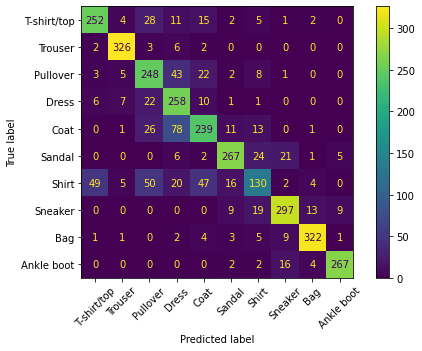

In [48]:
# average Ensamble of methods, uses RandForrest, KNN, and OVR

pred_final = (RF_pred+KNN_pred+OVR_pred)/3
predInt = pred_final.astype(int)
print("Accuracy of avg Ensamble Classifier: ", metrics.accuracy_score(y_test, predInt))
print("MSE of avg Ensamble", mean_squared_error(y_test, predInt))

fig, ax = plt.subplots(figsize=(8, 5))
cmp = ConfusionMatrixDisplay(
    confusion_matrix(y_test, predInt),
    display_labels=["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag",
                        "Ankle boot"],)
cmp.plot(ax=ax)
    
plt.xticks(rotation=45)
plt.show()